## Teaser Figures

In [ ]:
import pandas as pd
from analysis_fns import read_csv_with_tag, read_csv_with_tag_optimization, draw_pareto_fronts_teaser_figure, draw_pareto_fronts_teaser_figure_enlarged

accuracy = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/grpo/csv/optimization/math500-grpo-accuracy-optimization.csv', 'accuracy')
conciseness = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/grpo/csv/optimization/math500-grpo-conciseness-optimization.csv', 'conciseness')
format = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/grpo/csv/optimization/math500-grpo-format-optimization.csv', 'format')

baseline_accuracy = read_csv_with_tag("/home/yininglu/projects/rl/results/grpo/csv/baseline/math500-grpo-accuracy.csv", "accuracy")
baseline_conciseness = read_csv_with_tag("/home/yininglu/projects/rl/results/grpo/csv/baseline/math500-grpo-conciseness.csv", "conciseness")
baseline_format = read_csv_with_tag("/home/yininglu/projects/rl/results/grpo/csv/baseline/math500-grpo-format.csv", "format")

df = pd.concat([accuracy, conciseness, format], ignore_index=True)
df_baseline = pd.concat([baseline_accuracy, baseline_conciseness, baseline_format], ignore_index=True)

df_baseline = df_baseline.loc[:, df_baseline.columns.str.contains('poly|tag|Step')]

df_baseline.columns = [f"baseline-{col}" if col not in ['tag', 'Step'] else col for col in df_baseline.columns]

df = pd.merge(df, df_baseline, on=['tag', 'Step'], how='outer') 

In [2]:
for col in df.columns:
    appendix = "(baseline)" if "baseline" in col else "(ours)"
    if "333" in col:
        new_col = f"Balanced{appendix}"
    elif "-25HALF" in col:
        new_col = f"Efficiency-focused{appendix}"
    elif "-5HALF" in col:
        new_col = f"Accuracy-focused{appendix}"
    else:
        new_col = col
    df.rename(columns={col: new_col}, inplace=True)

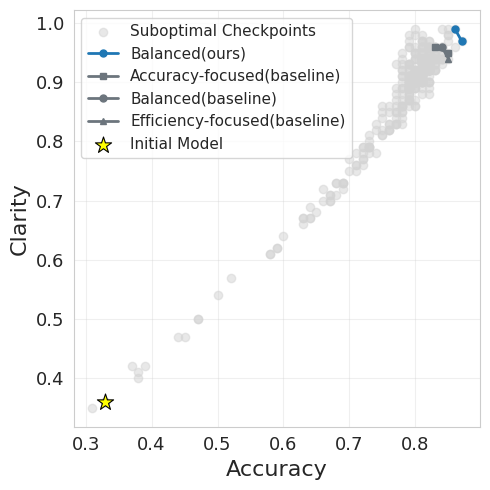

In [3]:
columns = ['Balanced(ours)',
           'Accuracy-focused(baseline)',
           'Balanced(baseline)',
           'Efficiency-focused(baseline)']


tags = ['accuracy', 'format']
maximize = [True, True] 

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/teaser/acc-format.png")

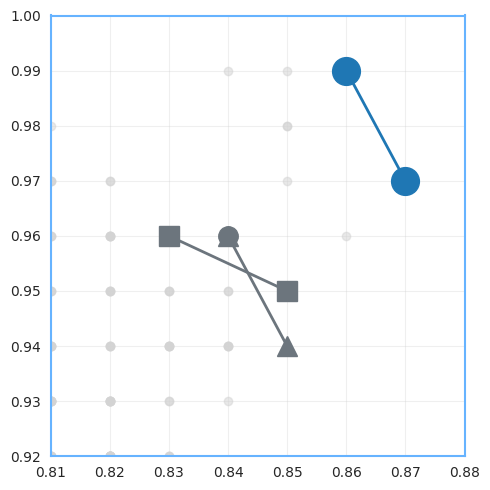

In [4]:
draw_pareto_fronts_teaser_figure_enlarged(df, columns, tags, maximize, xlim=(0.81, 0.88), ylim=(0.92, 1.0), save_path="/home/yininglu/projects/rl/figures/teaser/acc-format-enlarged.png")

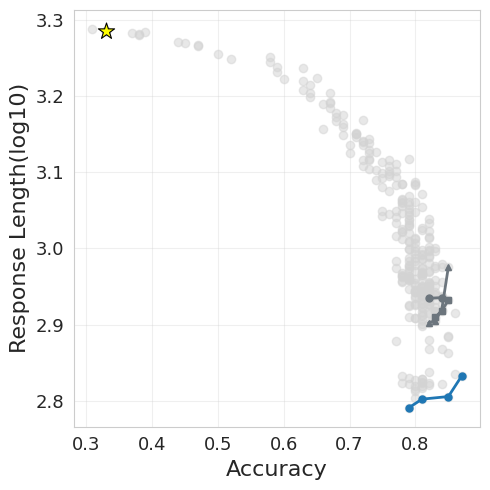

In [5]:
tags = ['accuracy', 'conciseness']
maximize = [True, False] 

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, add_legend=False, save_path="/home/yininglu/projects/rl/figures/teaser/acc-conciseness.png")

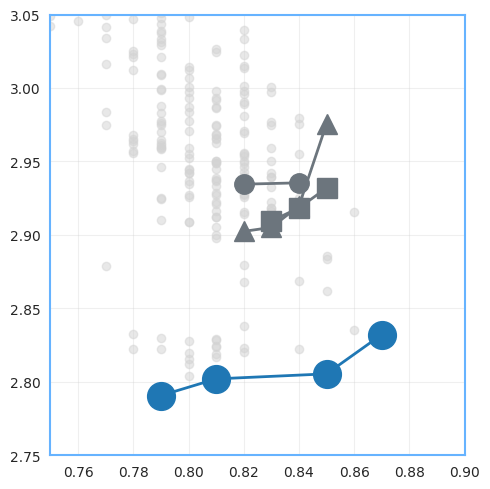

In [6]:
draw_pareto_fronts_teaser_figure_enlarged(df, columns, tags, maximize, xlim=(0.75, 0.9), ylim=(2.75, 3.05), save_path="/home/yininglu/projects/rl/figures/teaser/acc-conciseness-enlarged.png")

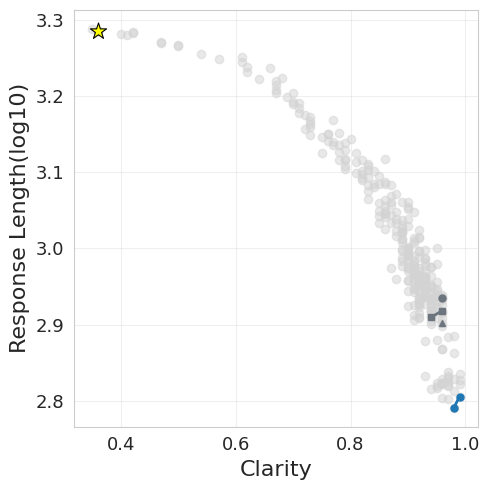

In [7]:
tags = ['format', 'conciseness']
maximize = [True, False] 

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, add_legend=False, save_path="/home/yininglu/projects/rl/figures/teaser/format-conciseness.png")

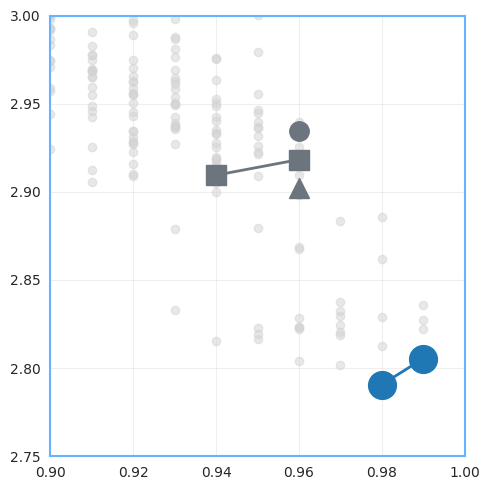

In [8]:
draw_pareto_fronts_teaser_figure_enlarged(df, columns, tags, maximize, xlim=(0.9, 1.0), ylim=(2.75, 3.0), save_path="/home/yininglu/projects/rl/figures/teaser/format-conciseness-enlarged.png")

## Hypervolume-Guided Weight Adaptation

In [1]:
import pandas as pd
from analysis_fns import read_csv_with_tag, read_csv_with_tag_vanilla, draw_pareto_fronts_teaser_figure, draw_pareto_fronts_teaser_figure_enlarged

accuracy = read_csv_with_tag_vanilla('/home/yininglu/projects/rl/results/grpo/csv/vanilla/version3/math500-grpo-accuracy-vanilla.csv', 'accuracy')
conciseness = read_csv_with_tag_vanilla('/home/yininglu/projects/rl/results/grpo/csv/vanilla/version3/math500-grpo-conciseness-vanilla.csv', 'conciseness')
format = read_csv_with_tag_vanilla('/home/yininglu/projects/rl/results/grpo/csv/vanilla/version3/math500-grpo-format-vanilla.csv', 'format')

baseline_accuracy = read_csv_with_tag("/home/yininglu/projects/rl/results/grpo/csv/baseline/math500-grpo-accuracy.csv", "accuracy")
baseline_conciseness = read_csv_with_tag("/home/yininglu/projects/rl/results/grpo/csv/baseline/math500-grpo-conciseness.csv", "conciseness")
baseline_format = read_csv_with_tag("/home/yininglu/projects/rl/results/grpo/csv/baseline/math500-grpo-format.csv", "format")

# concatenate dataframes
df = pd.concat([accuracy, conciseness, format], ignore_index=True)
df_baseline = pd.concat([baseline_accuracy, baseline_conciseness, baseline_format], ignore_index=True)

# remove columns that have "cosine" or "poly" in the name
df_baseline = df_baseline.loc[:, ~df_baseline.columns.str.contains('cosine|poly')]

df_baseline.columns = [f"baseline-{col}" if col not in ['tag', 'Step'] else col for col in df_baseline.columns]

df = pd.merge(df, df_baseline, on=['tag', 'Step'], how='outer') 

In [2]:
for col in df.columns:
    appendix = "(baseline)" if "baseline" in col else "(ours)"
    if "333" in col:
        new_col = f"Balanced{appendix}"
    elif "-25HALF" in col:
        new_col = f"Efficiency-focused{appendix}"
    elif "-5HALF" in col:
        new_col = f"Accuracy-focused{appendix}"
    else:
        new_col = col
    df.rename(columns={col: new_col}, inplace=True)

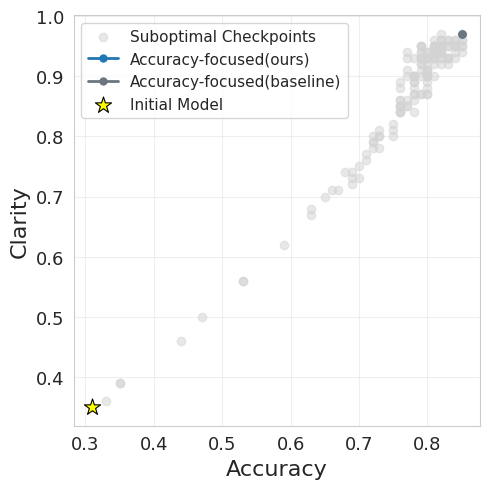

In [3]:
columns = ['Accuracy-focused(ours)',
           'Accuracy-focused(baseline)']

tags = ['accuracy', 'format']
maximize = [True, True] 

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/grpo/acc-focused_acc-format.pdf")

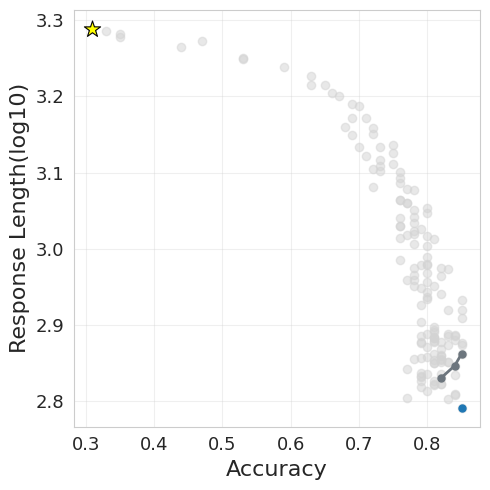

In [4]:
tags = ['accuracy', 'conciseness']
maximize = [True, False]

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/grpo/acc-focused_acc-conciseness.pdf", add_legend=False)

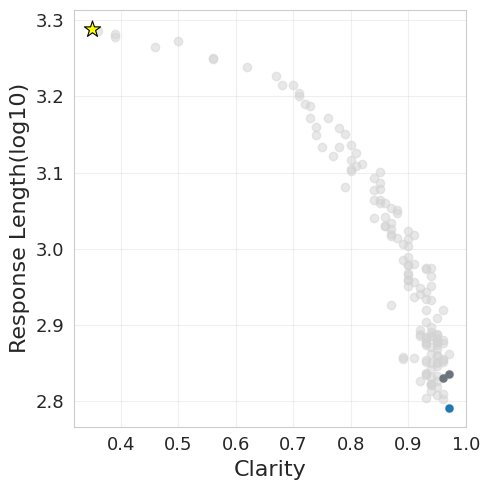

In [5]:
tags = ['format', 'conciseness']
maximize = [True, False]

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/grpo/acc-focused_format-conciseness.pdf", add_legend=False)

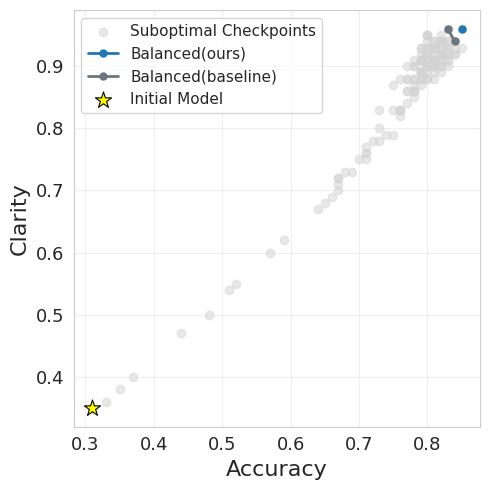

In [6]:
columns = ['Balanced(ours)',
           'Balanced(baseline)']

tags = ['accuracy', 'format']
maximize = [True, True] 

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/grpo/balanced_acc-format.pdf")

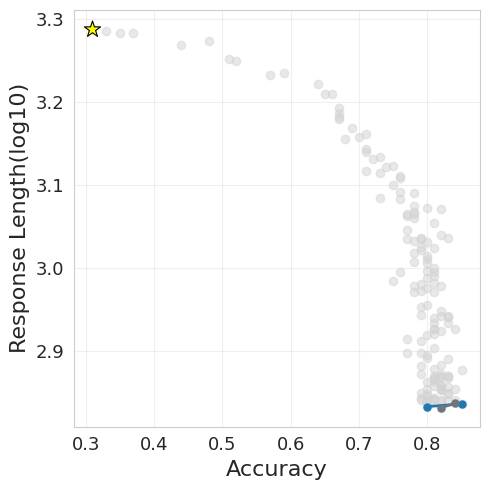

In [7]:
tags = ['accuracy', 'conciseness']
maximize = [True, False]

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/grpo/balanced_acc-conciseness.pdf", add_legend=False)

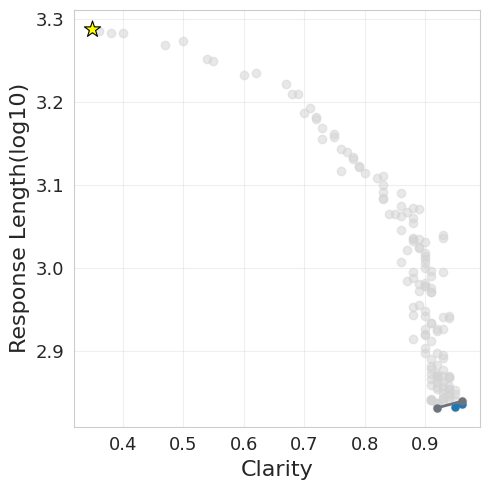

In [8]:
tags = ['format', 'conciseness']
maximize = [True, False]

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/grpo/balanced_format-conciseness.pdf", add_legend=False)

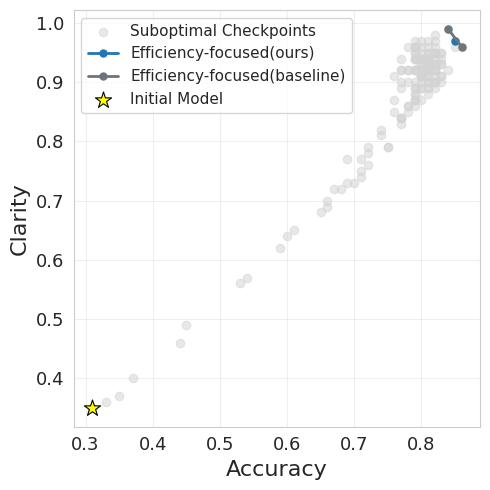

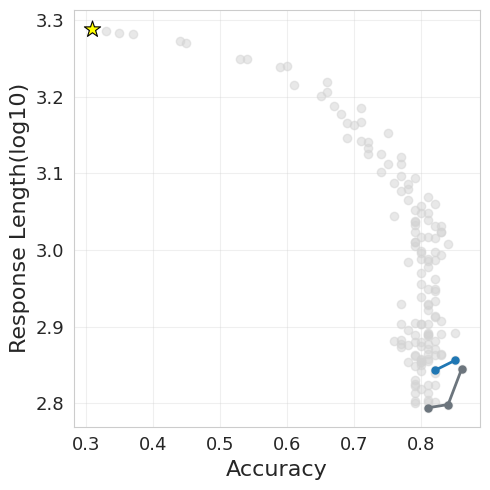

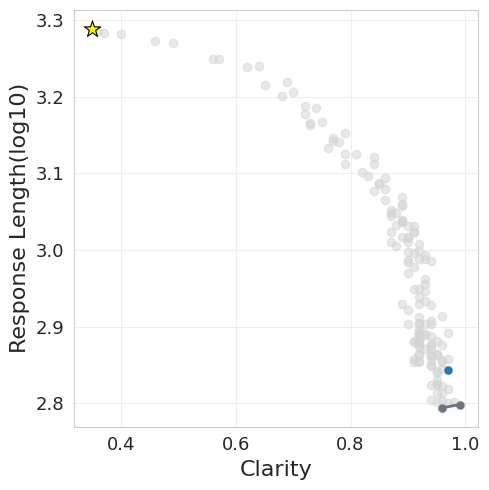

In [9]:
columns = ['Efficiency-focused(ours)',
           'Efficiency-focused(baseline)']

tags = ['accuracy', 'format']
maximize = [True, True] 

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/grpo/efficiency-focused_acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False]

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/grpo/efficiency-focused_acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False]

draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/grpo/efficiency-focused_format-conciseness.pdf", add_legend=False)

In [14]:
import pandas as pd
from analysis_fns import read_csv_with_tag, read_csv_with_tag_vanilla, draw_pareto_fronts_teaser_figure, draw_pareto_fronts_teaser_figure_enlarged

accuracy = read_csv_with_tag_vanilla('/home/yininglu/projects/rl/results/reinforce/vanilla/math500-reinforce-accuracy-vanilla.csv', 'accuracy')
conciseness = read_csv_with_tag_vanilla('/home/yininglu/projects/rl/results/reinforce/vanilla/math500-reinforce-conciseness-vanilla.csv', 'conciseness')
format = read_csv_with_tag_vanilla('/home/yininglu/projects/rl/results/reinforce/vanilla/math500-reinforce-format-vanilla.csv', 'format')

baseline_accuracy = read_csv_with_tag("/home/yininglu/projects/rl/results/reinforce/baseline/math500-reinforce-accuracy.csv", "accuracy")
baseline_conciseness = read_csv_with_tag("/home/yininglu/projects/rl/results/reinforce/baseline/math500-reinforce-conciseness.csv", "conciseness")
baseline_format = read_csv_with_tag("/home/yininglu/projects/rl/results/reinforce/baseline/math500-reinforce-format.csv", "format")

# concatenate dataframes
df = pd.concat([accuracy, conciseness, format], ignore_index=True)
df_baseline = pd.concat([baseline_accuracy, baseline_conciseness, baseline_format], ignore_index=True)

# remove columns that have "cosine" or "poly" in the name
df_baseline = df_baseline.loc[:, ~df_baseline.columns.str.contains('cosine|poly')]

df_baseline.columns = [f"baseline-{col}" if col not in ['tag', 'Step'] else col for col in df_baseline.columns]

df = pd.merge(df, df_baseline, on=['tag', 'Step'], how='outer') 

In [15]:
for col in df.columns:
    appendix = "(baseline)" if "baseline" in col else "(ours)"
    if "333" in col:
        new_col = f"Balanced{appendix}"
    elif "-25HALF" in col:
        new_col = f"Efficiency-focused{appendix}"
    elif "-5HALF" in col:
        new_col = f"Accuracy-focused{appendix}"
    else:
        new_col = col
    df.rename(columns={col: new_col}, inplace=True)

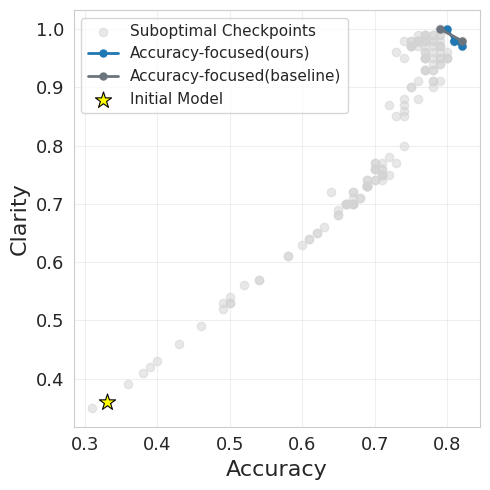

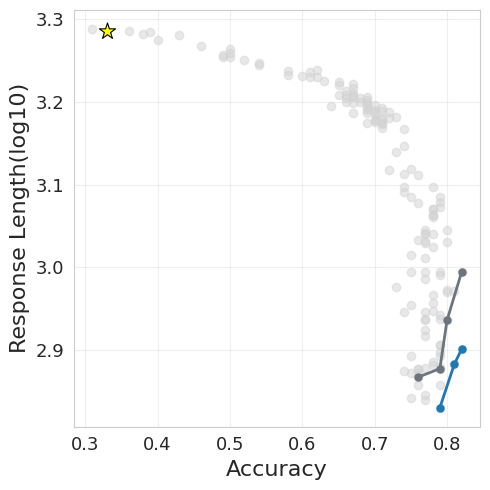

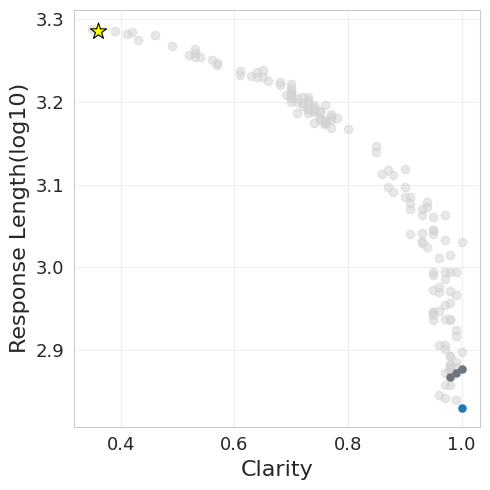

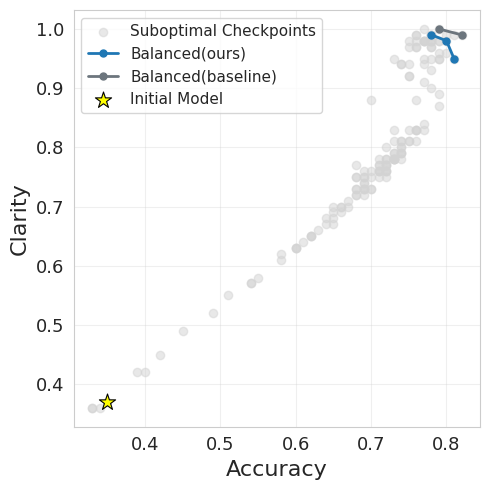

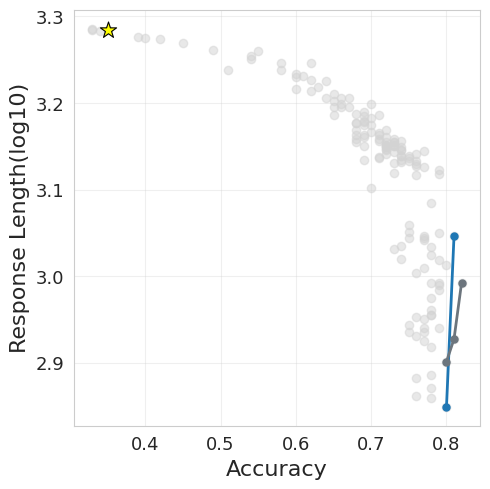

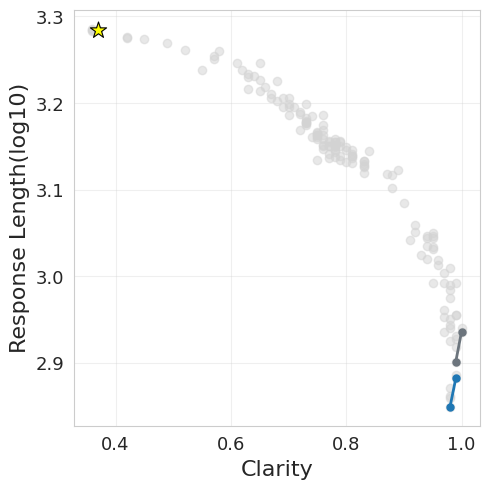

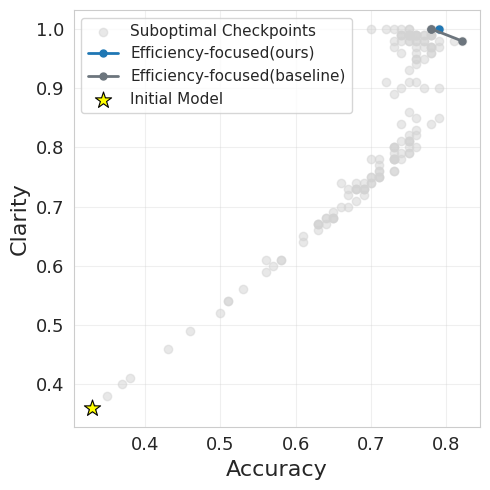

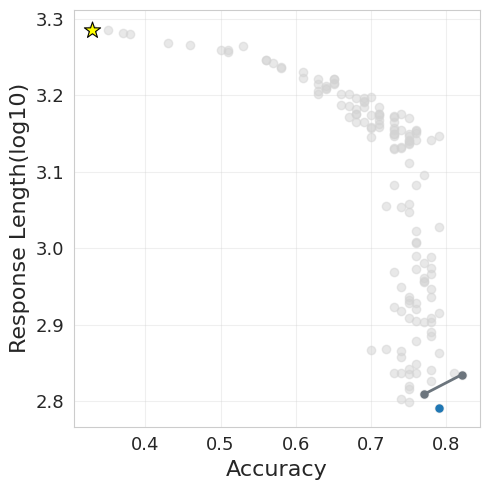

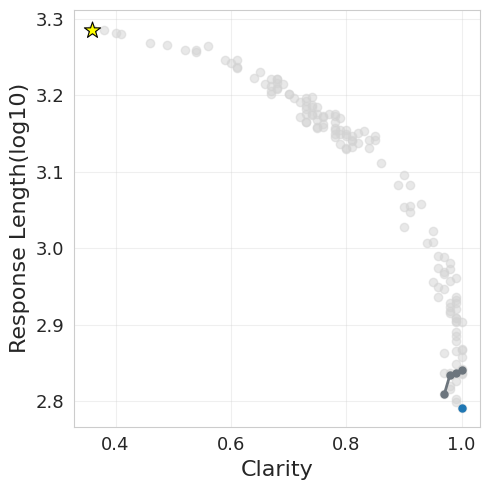

In [16]:
columns = ['Accuracy-focused(ours)',
           'Accuracy-focused(baseline)']

tags = ['accuracy', 'format']
maximize = [True, True] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/reinforce/acc-focused_acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/reinforce/acc-focused_acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/reinforce/acc-focused_format-conciseness.pdf", add_legend=False)


columns = ['Balanced(ours)',
           'Balanced(baseline)']

tags = ['accuracy', 'format']
maximize = [True, True] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/reinforce/balanced_acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/reinforce/balanced_acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/reinforce/balanced_format-conciseness.pdf", add_legend=False)


columns = ['Efficiency-focused(ours)',
           'Efficiency-focused(baseline)']

tags = ['accuracy', 'format']
maximize = [True, True] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/reinforce/efficiency-focused_acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/reinforce/efficiency-focused_acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/reinforce/efficiency-focused_format-conciseness.pdf", add_legend=False)

In [20]:
import pandas as pd
from analysis_fns import read_csv_with_tag, read_csv_with_tag_vanilla, draw_pareto_fronts_teaser_figure, draw_pareto_fronts_teaser_figure_enlarged

accuracy = read_csv_with_tag_vanilla('/home/yininglu/projects/rl/results/rloo/vanilla/math500-rloo-accuracy-vanilla.csv', 'accuracy')
conciseness = read_csv_with_tag_vanilla('/home/yininglu/projects/rl/results/rloo/vanilla/math500-rloo-conciseness-vanilla.csv', 'conciseness')
format = read_csv_with_tag_vanilla('/home/yininglu/projects/rl/results/rloo/vanilla/math500-rloo-format-vanilla.csv', 'format')

baseline_accuracy = read_csv_with_tag("/home/yininglu/projects/rl/results/rloo/baseline/math500-rloo-accuracy.csv", "accuracy")
baseline_conciseness = read_csv_with_tag("/home/yininglu/projects/rl/results/rloo/baseline/math500-rloo-conciseness.csv", "conciseness")
baseline_format = read_csv_with_tag("/home/yininglu/projects/rl/results/rloo/baseline/math500-rloo-format.csv", "format")

# concatenate dataframes
df = pd.concat([accuracy, conciseness, format], ignore_index=True)
df_baseline = pd.concat([baseline_accuracy, baseline_conciseness, baseline_format], ignore_index=True)

# remove columns that have "cosine" or "poly" in the name
df_baseline = df_baseline.loc[:, ~df_baseline.columns.str.contains('cosine|poly')]

df_baseline.columns = [f"baseline-{col}" if col not in ['tag', 'Step'] else col for col in df_baseline.columns]

df = pd.merge(df, df_baseline, on=['tag', 'Step'], how='outer') 

In [21]:
for col in df.columns:
    appendix = "(baseline)" if "baseline" in col else "(ours)"
    if "333" in col:
        new_col = f"Balanced{appendix}"
    elif "-25HALF" in col:
        new_col = f"Efficiency-focused{appendix}"
    elif "-5HALF" in col:
        new_col = f"Accuracy-focused{appendix}"
    else:
        new_col = col
    df.rename(columns={col: new_col}, inplace=True)

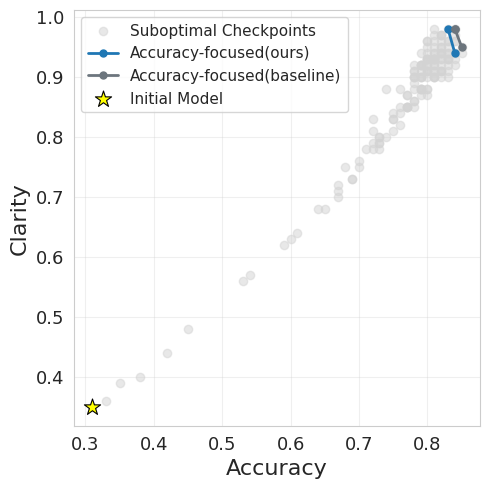

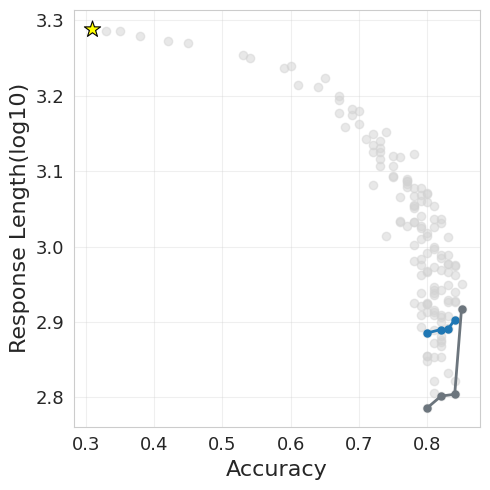

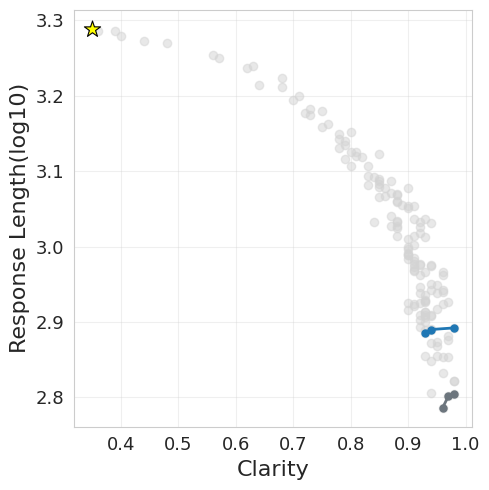

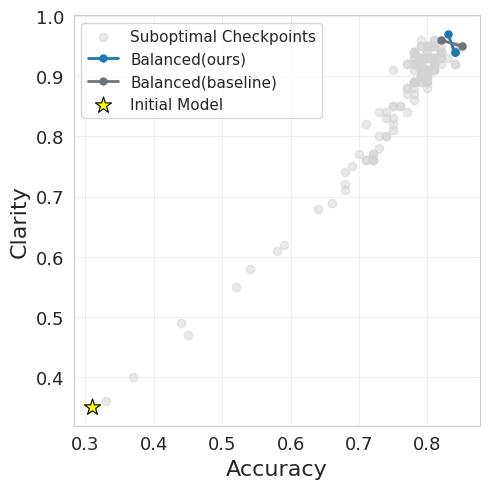

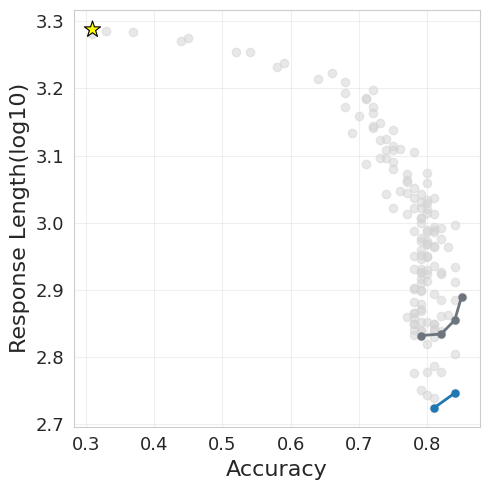

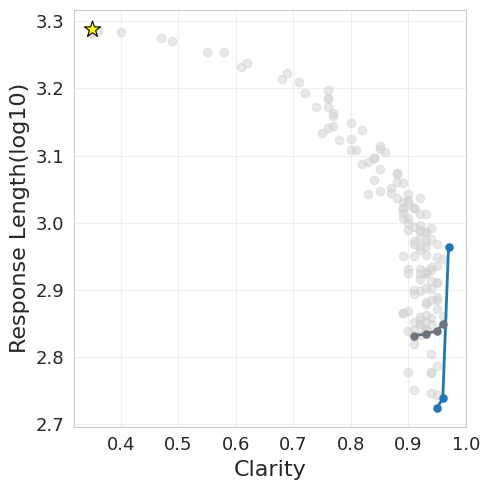

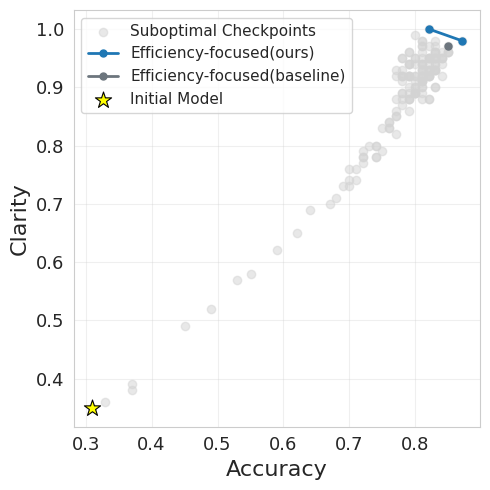

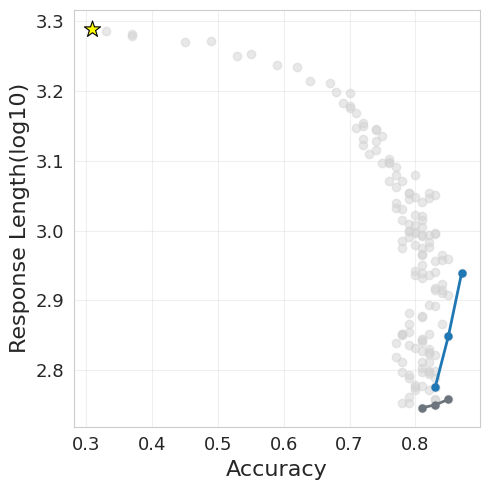

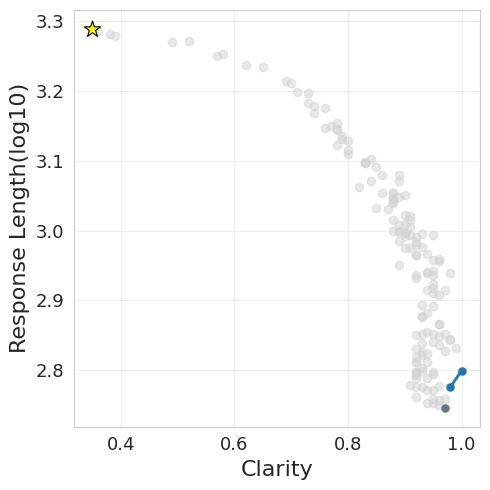

In [22]:
columns = ['Accuracy-focused(ours)',
           'Accuracy-focused(baseline)']

tags = ['accuracy', 'format']
maximize = [True, True] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/rloo/acc-focused_acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/rloo/acc-focused_acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/rloo/acc-focused_format-conciseness.pdf", add_legend=False)


columns = ['Balanced(ours)',
           'Balanced(baseline)']

tags = ['accuracy', 'format']
maximize = [True, True] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/rloo/balanced_acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/rloo/balanced_acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/rloo/balanced_format-conciseness.pdf", add_legend=False)


columns = ['Efficiency-focused(ours)',
           'Efficiency-focused(baseline)']

tags = ['accuracy', 'format']
maximize = [True, True] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/rloo/efficiency-focused_acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/rloo/efficiency-focused_acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False]
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/rloo/efficiency-focused_format-conciseness.pdf", add_legend=False)

## Gradient-Based Weight Optimization

In [23]:
import pandas as pd
from analysis_fns import read_csv_with_tag, read_csv_with_tag_optimization, draw_pareto_fronts_teaser_figure, draw_pareto_fronts_teaser_figure_enlarged

accuracy = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/grpo/csv/optimization/math500-grpo-accuracy-optimization.csv', 'accuracy')
conciseness = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/grpo/csv/optimization/math500-grpo-conciseness-optimization.csv', 'conciseness')
format = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/grpo/csv/optimization/math500-grpo-format-optimization.csv', 'format')

baseline_accuracy = read_csv_with_tag("/home/yininglu/projects/rl/results/grpo/csv/baseline/math500-grpo-accuracy.csv", "accuracy")
baseline_conciseness = read_csv_with_tag("/home/yininglu/projects/rl/results/grpo/csv/baseline/math500-grpo-conciseness.csv", "conciseness")
baseline_format = read_csv_with_tag("/home/yininglu/projects/rl/results/grpo/csv/baseline/math500-grpo-format.csv", "format")

# concatenate dataframes
df = pd.concat([accuracy, conciseness, format], ignore_index=True)
df_baseline = pd.concat([baseline_accuracy, baseline_conciseness, baseline_format], ignore_index=True)

# keep columns that have "poly" "tag" and "Step" in the name
df_baseline = df_baseline.loc[:, df_baseline.columns.str.contains('poly|tag|Step')]

df_baseline.columns = [f"baseline-{col}" if col not in ['tag', 'Step'] else col for col in df_baseline.columns]

df = pd.merge(df, df_baseline, on=['tag', 'Step'], how='outer') 

In [24]:
for col in df.columns:
    appendix = "(baseline)" if "baseline" in col else "(ours)"
    if "333" in col:
        new_col = f"Balanced{appendix}"
    elif "-25HALF" in col:
        new_col = f"Efficiency-focused{appendix}"
    elif "-5HALF" in col:
        new_col = f"Accuracy-focused{appendix}"
    else:
        new_col = col
    df.rename(columns={col: new_col}, inplace=True)

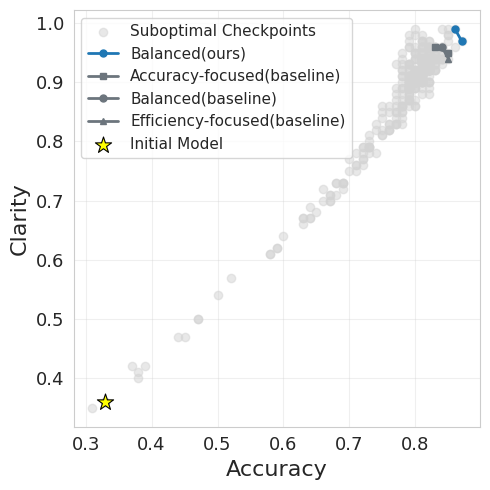

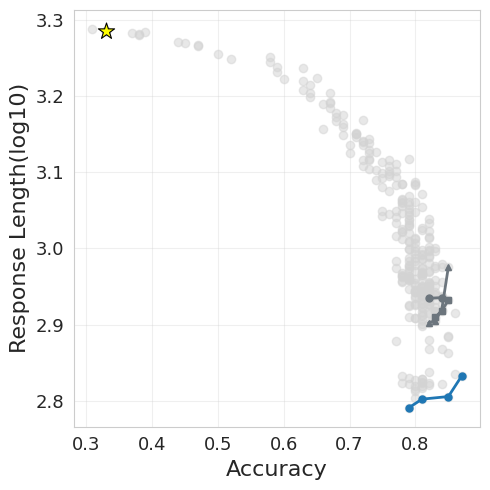

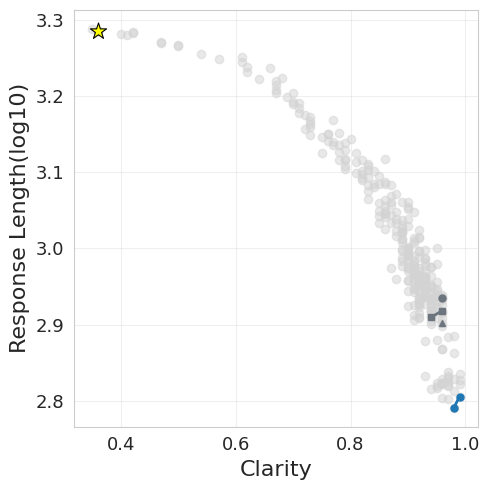

In [25]:
columns = ['Balanced(ours)',
           'Accuracy-focused(baseline)',
           'Balanced(baseline)',
           'Efficiency-focused(baseline)']


tags = ['accuracy', 'format']
maximize = [True, True] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/optimization/grpo/acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/optimization/grpo/acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/optimization/grpo/format-conciseness.pdf", add_legend=False)

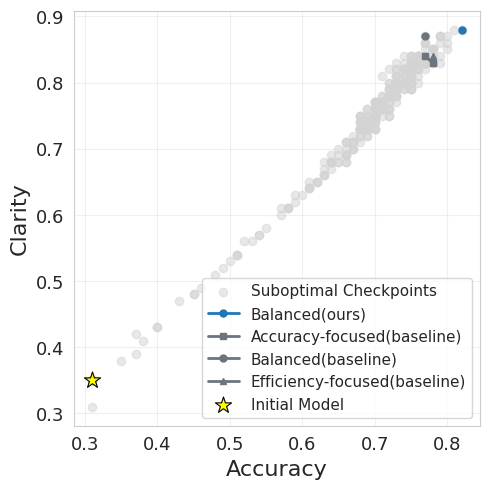

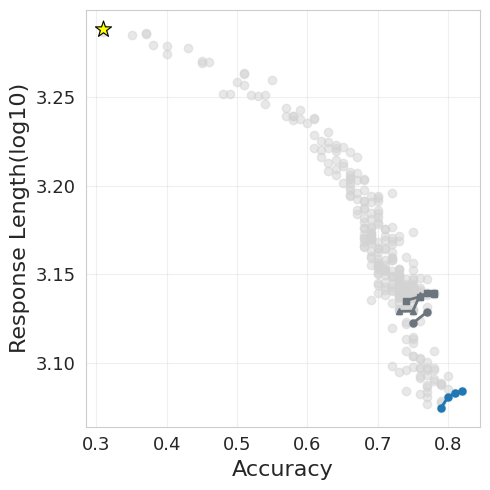

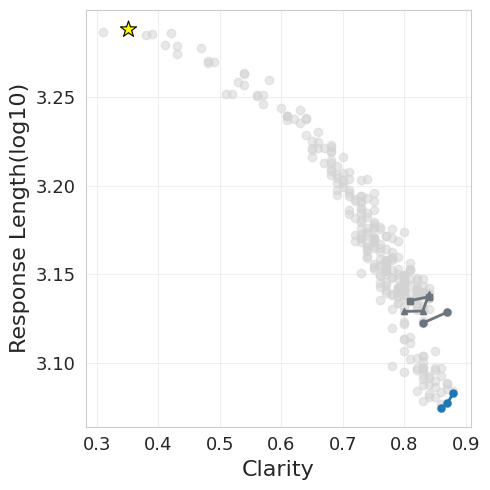

In [26]:
import pandas as pd
from analysis_fns import read_csv_with_tag, read_csv_with_tag_optimization, draw_pareto_fronts_teaser_figure, draw_pareto_fronts_teaser_figure_enlarged

accuracy = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/reinforce/optimization/math500-reinforce-accuracy-optimization.csv', 'accuracy')
conciseness = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/reinforce/optimization/math500-reinforce-conciseness-optimization.csv', 'conciseness')
format = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/reinforce/optimization/math500-reinforce-format-optimization.csv', 'format')

baseline_accuracy = read_csv_with_tag("/home/yininglu/projects/rl/results/reinforce/baseline/math500-reinforce-accuracy.csv", "accuracy")
baseline_conciseness = read_csv_with_tag("/home/yininglu/projects/rl/results/reinforce/baseline/math500-reinforce-conciseness.csv", "conciseness")
baseline_format = read_csv_with_tag("/home/yininglu/projects/rl/results/reinforce/baseline/math500-reinforce-format.csv", "format")

# concatenate dataframes
df = pd.concat([accuracy, conciseness, format], ignore_index=True)
df_baseline = pd.concat([baseline_accuracy, baseline_conciseness, baseline_format], ignore_index=True)

# keep columns that have "poly" "tag" and "Step" in the name
df_baseline = df_baseline.loc[:, df_baseline.columns.str.contains('poly|tag|Step')]

df_baseline.columns = [f"baseline-{col}" if col not in ['tag', 'Step'] else col for col in df_baseline.columns]

df = pd.merge(df, df_baseline, on=['tag', 'Step'], how='outer') 

for col in df.columns:
    appendix = "(baseline)" if "baseline" in col else "(ours)"
    if "333" in col:
        new_col = f"Balanced{appendix}"
    elif "-25HALF" in col:
        new_col = f"Efficiency-focused{appendix}"
    elif "-5HALF" in col:
        new_col = f"Accuracy-focused{appendix}"
    else:
        new_col = col
    df.rename(columns={col: new_col}, inplace=True)


columns = ['Balanced(ours)',
           'Accuracy-focused(baseline)',
           'Balanced(baseline)',
           'Efficiency-focused(baseline)']


tags = ['accuracy', 'format']
maximize = [True, True] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/optimization/reinforce/acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/optimization/reinforce/acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/optimization/reinforce/format-conciseness.pdf", add_legend=False)


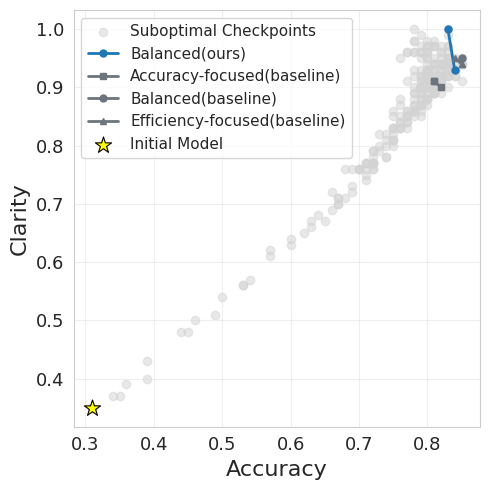

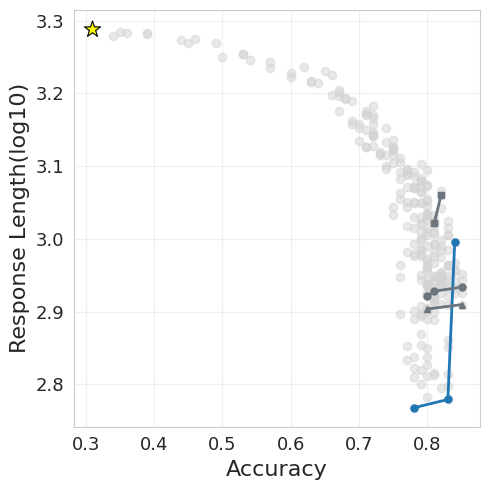

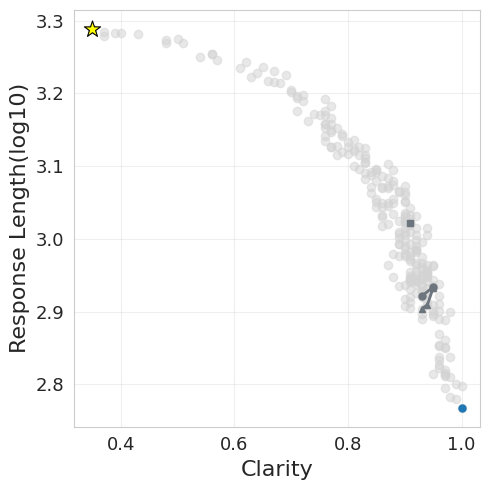

In [27]:
import pandas as pd
from analysis_fns import read_csv_with_tag, read_csv_with_tag_optimization, draw_pareto_fronts_teaser_figure, draw_pareto_fronts_teaser_figure_enlarged

accuracy = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/rloo/optimization/math500-rloo-accuracy-optimization.csv', 'accuracy')
conciseness = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/rloo/optimization/math500-rloo-conciseness-optimization.csv', 'conciseness')
format = read_csv_with_tag_optimization('/home/yininglu/projects/rl/results/rloo/optimization/math500-rloo-format-optimization.csv', 'format')

baseline_accuracy = read_csv_with_tag("/home/yininglu/projects/rl/results/rloo/baseline/math500-rloo-accuracy.csv", "accuracy")
baseline_conciseness = read_csv_with_tag("/home/yininglu/projects/rl/results/rloo/baseline/math500-rloo-conciseness.csv", "conciseness")
baseline_format = read_csv_with_tag("/home/yininglu/projects/rl/results/rloo/baseline/math500-rloo-format.csv", "format")

# concatenate dataframes
df = pd.concat([accuracy, conciseness, format], ignore_index=True)
df_baseline = pd.concat([baseline_accuracy, baseline_conciseness, baseline_format], ignore_index=True)

# keep columns that have "poly" "tag" and "Step" in the name
df_baseline = df_baseline.loc[:, df_baseline.columns.str.contains('poly|tag|Step')]

df_baseline.columns = [f"baseline-{col}" if col not in ['tag', 'Step'] else col for col in df_baseline.columns]

df = pd.merge(df, df_baseline, on=['tag', 'Step'], how='outer') 

for col in df.columns:
    appendix = "(baseline)" if "baseline" in col else "(ours)"
    if "333" in col:
        new_col = f"Balanced{appendix}"
    elif "-25HALF" in col:
        new_col = f"Efficiency-focused{appendix}"
    elif "-5HALF" in col:
        new_col = f"Accuracy-focused{appendix}"
    else:
        new_col = col
    df.rename(columns={col: new_col}, inplace=True)


columns = ['Balanced(ours)',
           'Accuracy-focused(baseline)',
           'Balanced(baseline)',
           'Efficiency-focused(baseline)']


tags = ['accuracy', 'format']
maximize = [True, True] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/optimization/rloo/acc-format.pdf")

tags = ['accuracy', 'conciseness']
maximize = [True, False] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/optimization/rloo/acc-conciseness.pdf", add_legend=False)

tags = ['format', 'conciseness']
maximize = [True, False] 
draw_pareto_fronts_teaser_figure(df, columns, tags, maximize, save_path="/home/yininglu/projects/rl/figures/appendix/optimization/rloo/format-conciseness.pdf", add_legend=False)
